In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

# 데이터 확인

In [3]:
df = pd.read_csv("./data/seoul.csv", skiprows = 6)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42095 entries, 0 to 42094
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42095 non-null  object 
 1   지점       42095 non-null  int64  
 2   평균기온(℃)  41339 non-null  float64
 3   최저기온(℃)  41336 non-null  float64
 4   최고기온(℃)  41336 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df.dtypes

날짜          object
지점           int64
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
dtype: object

In [7]:
df.shape

(42095, 5)

In [8]:
df[df["지점"] != 108].count()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [10]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,42095.0,41339.000000,41336.000000,41336.000000
mean,108.0,11.777776,7.490495,16.777593
std,0.0,10.661494,10.889021,10.975401
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [6]:
# 날짜 이상데이터 제거
df["날짜"] = df["날짜"].str.strip()

In [14]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [17]:
df[df["최저기온(℃)"] < -20]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
83,1907-12-23,108,-13.3,-20.1,-9.4
1200,1911-01-13,108,-15.3,-21.5,-9.2
2660,1915-01-12,108,-14.6,-20.9,-0.7
2661,1915-01-13,108,-19.2,-21.3,-16.3
2662,1915-01-14,108,-18.0,-21.3,-13.8
2663,1915-01-15,108,-14.0,-20.5,-7.8
3387,1917-01-08,108,-15.5,-20.4,-11.2
3401,1917-01-22,108,-12.8,-21.1,-6.3
3740,1917-12-27,108,-13.8,-20.4,-8.7
3747,1918-01-03,108,-14.4,-21.8,-7.7


In [16]:
df.iloc[7396]

날짜         1927-12-31
지점                108
평균기온(℃)         -15.3
최저기온(℃)         -23.1
최고기온(℃)          -6.4
Name: 7396, dtype: object

In [4]:
# 결측치 확인
df.isna().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

In [8]:
df[df["최고기온(℃)"].isna()].head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN


- 1950년에 6.25 전쟁으로 당시 데이터가 수집되지 않은 것으로 추정
    - 1950/60/25 ~ 1953/07/27

In [9]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [10]:
df.columns = [
    "날짜",
    "지점",
    "평균기온",
    "최저기온",
    "최고기온"
]

In [11]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


# 데이터 분석

## 서울이 가장 더웠던 날

- 서울의 최고기온이 가장 높았던 날
- 저런 애매한 표현의 경우 팀원과의 원활한 의사소통을 위해 기준을 명확하게 통일시켜야 함
    - ??? : 그래서 가장 더웠던 날은 기준이 뭐야?

In [18]:
df.iloc[df["최고기온"].idxmax()]

날짜      2018-08-01
지점             108
평균기온          33.6
최저기온          27.8
최고기온          39.6
Name: 40051, dtype: object

In [19]:
df.loc[df["최고기온"] >= 38]

,날짜,지점,평균기온,최저기온,최고기온
11636,1939-08-10,108,30.1,24.5,38.2
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
31277,1994-07-24,108,33.1,28.1,38.4
40041,2018-07-22,108,31.8,25.3,38.0
40050,2018-07-31,108,32.6,27.8,38.3
40051,2018-08-01,108,33.6,27.8,39.6
40065,2018-08-15,108,31.7,28.3,38.0


In [20]:
df.sort_values(by = "최고기온", ascending = False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
31276,1994-07-23,108,32.6,28.0,38.2
13111,1943-08-24,108,29.0,23.2,38.2
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


## 내 생일의 기온 변화

In [23]:
# 생일 데이터 추출 ver1
df.loc[df["날짜"].str.endswith("02-16")]

,날짜,지점,평균기온,최저기온,최고기온
138,1908-02-16,108,-5.2,-8.8,-1.4
504,1909-02-16,108,-3.3,-6.4,1.0
869,1910-02-16,108,0.3,-2.2,4.3
1234,1911-02-16,108,-6.1,-8.7,-2.2
1599,1912-02-16,108,-1.2,-4.3,4.8
...,...,...,...,...,...
40615,2020-02-16,108,-1.4,-4.3,7.7
40981,2021-02-16,108,-5.1,-7.0,-1.3
41346,2022-02-16,108,-7.3,-9.6,-4.1
41711,2023-02-16,108,2.3,-0.7,4.5


In [24]:
# 생일 데이터 추출 ver2
ndf = df.copy()

In [26]:
ndf["date"] = pd.to_datetime(df["날짜"])

In [27]:
ndf.head()

,날짜,지점,평균기온,최저기온,최고기온,date
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [33]:
birthday_df = ndf[(ndf["date"].dt.month == 2) & (ndf["date"].dt.day == 16)]

In [35]:
birthday_df[birthday_df["date"].dt.year >= 1995].head()

,날짜,지점,평균기온,최저기온,최고기온,date
31484,1995-02-16,108,-1.0,-4.9,3.4,1995-02-16
31849,1996-02-16,108,-2.3,-6.6,2.8,1996-02-16
32215,1997-02-16,108,-4.0,-7.1,2.0,1997-02-16
32580,1998-02-16,108,3.0,-1.3,7.4,1998-02-16
32945,1999-02-16,108,4.7,0.3,10.2,1999-02-16


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


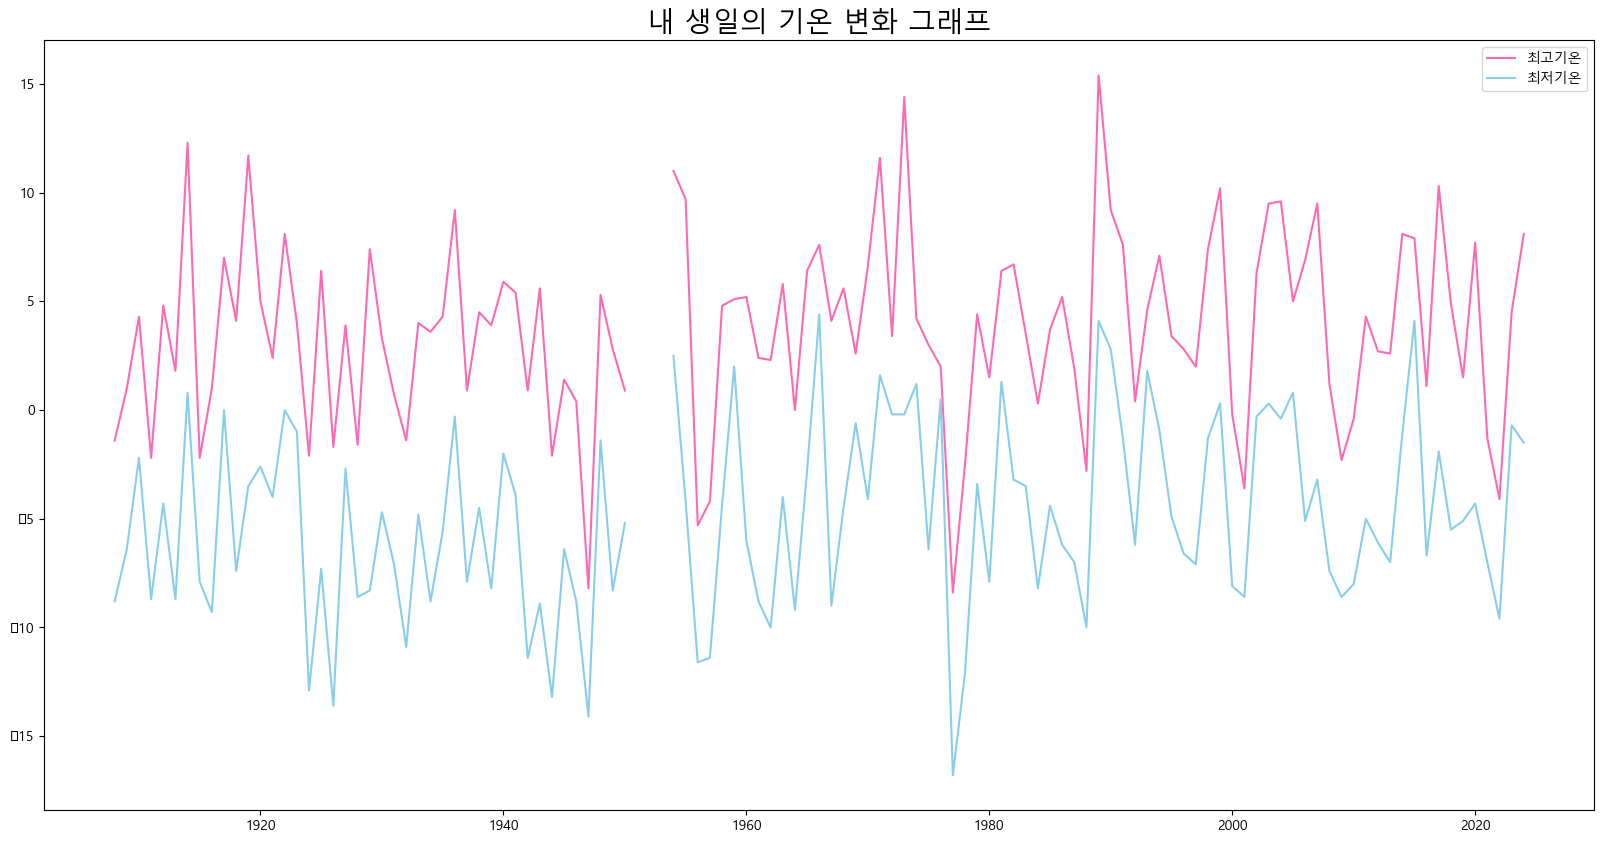

In [36]:
# 시각화
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(birthday_df["date"].dt.year, birthday_df["최고기온"], "hotpink", label = "최고기온")
ax.plot(birthday_df["date"].dt.year, birthday_df["최저기온"], "skyblue", label = "최저기온")
ax.legend()
ax.set_title("내 생일의 기온 변화 그래프", size = 20)

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


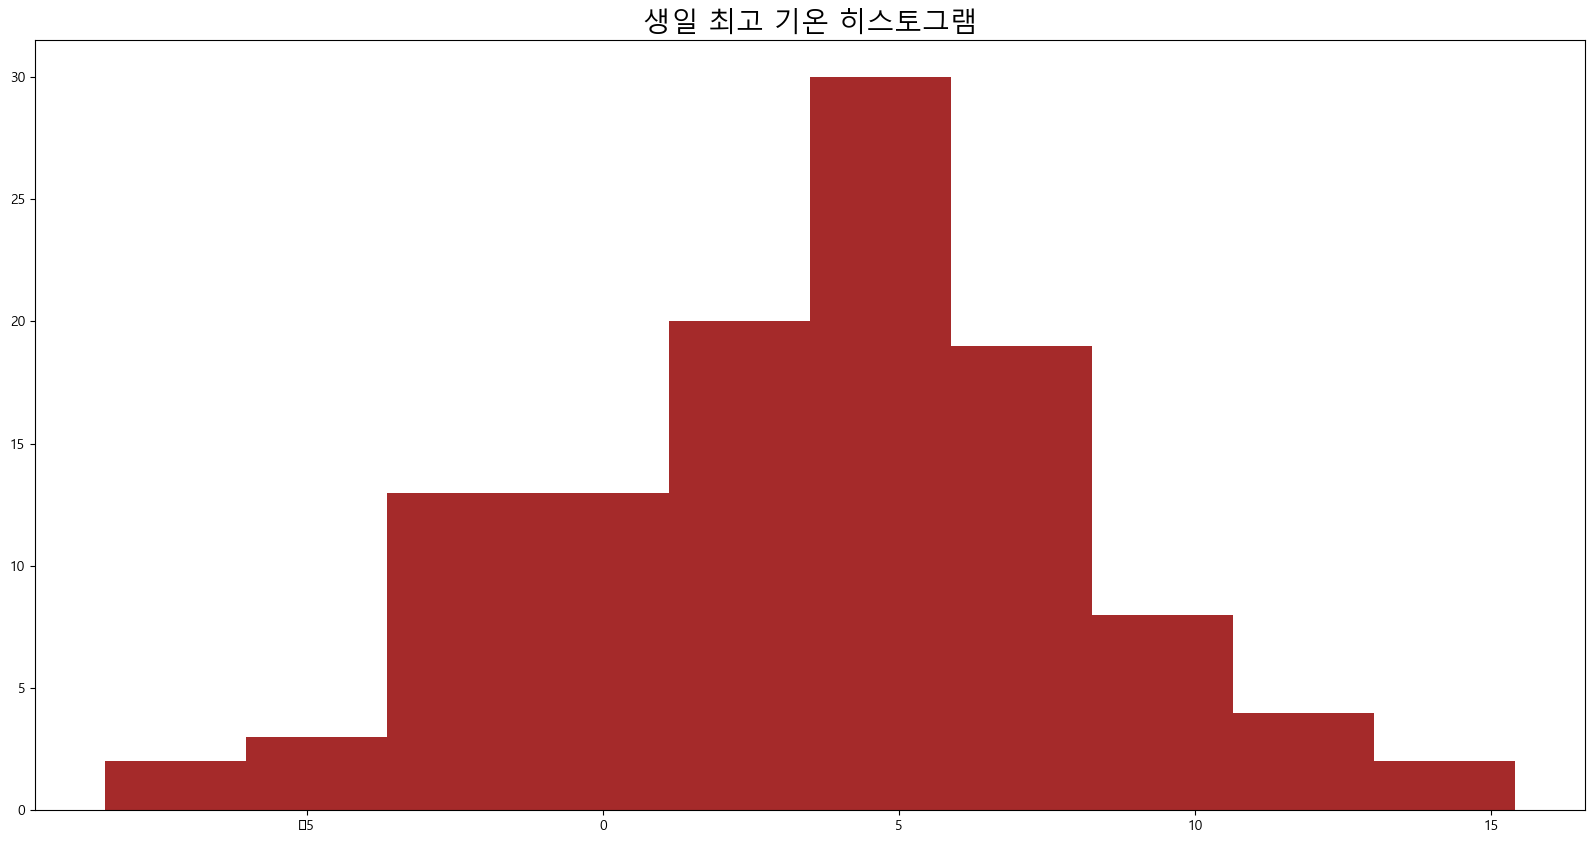

In [37]:
fig = plt.figure(figsize= (20 , 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(birthday_df["최고기온"], color = "brown")
ax.set_title("생일 최고 기온 히스토그램", size = 20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


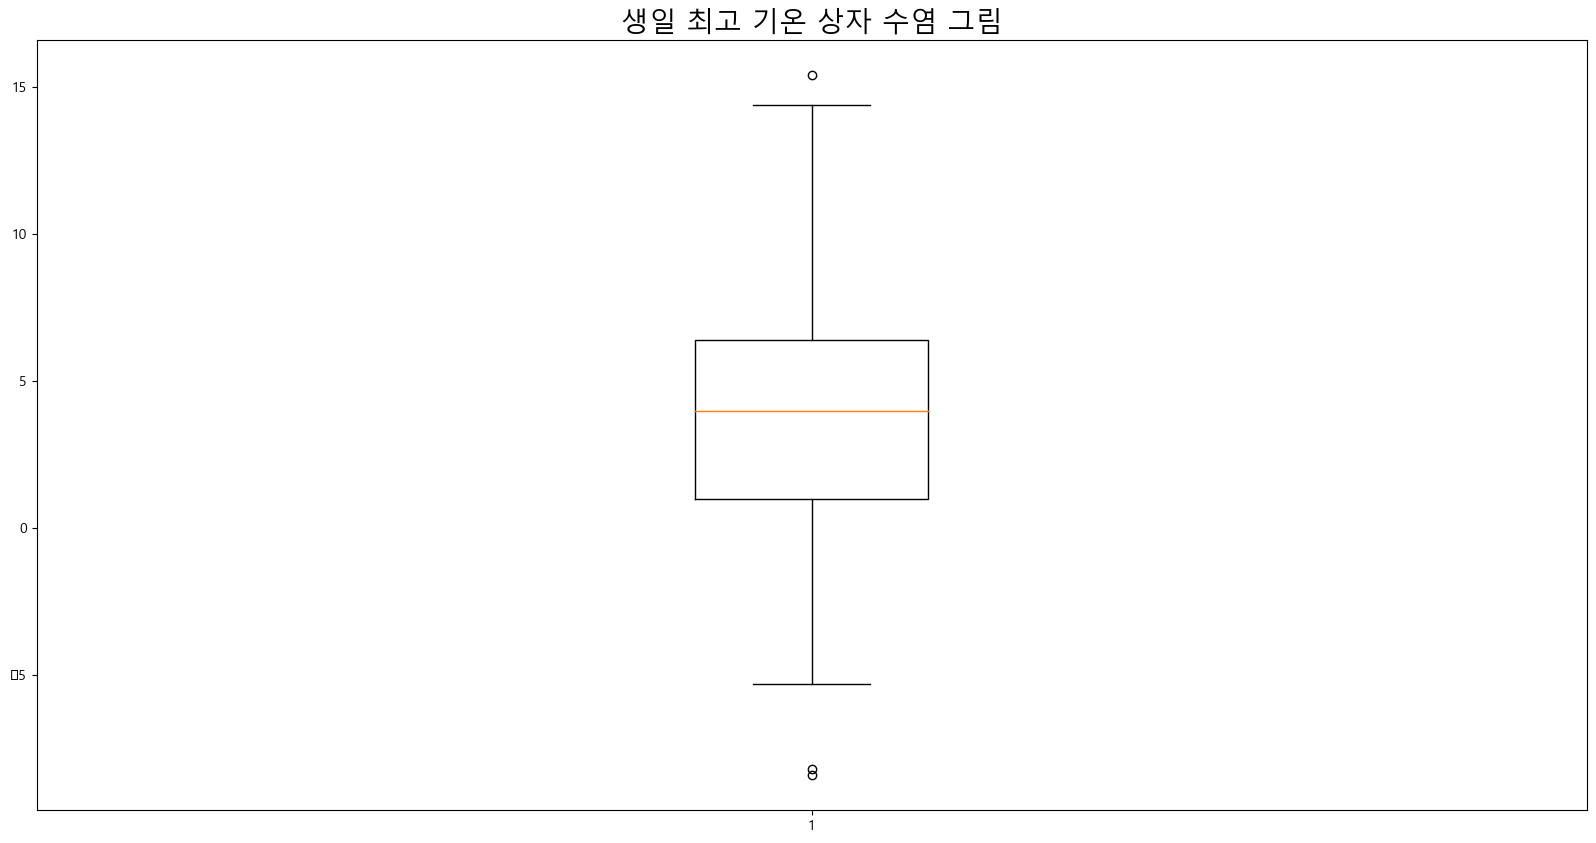

In [38]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(birthday_df["최고기온"].dropna())
ax.set_title("생일 최고 기온 상자 수염 그림", size = 20)
plt.show()

In [39]:
iqr = np.subtract(*np.percentile(birthday_df["최고기온"].dropna(), [75, 25]))
iqr

5.4

In [40]:
q3, q1 = np.percentile(birthday_df["최고기온"].dropna(), [75, 25])

In [41]:
outlier = q1 - (1.5 * iqr)
outlier

-7.100000000000001

In [43]:
birthday_df[birthday_df["고기온"] < outlier]

,날짜,지점,평균기온,최저기온,최고기온,date
14383,1947-02-16,108,-11.9,-14.1,-8.2,1947-02-16
24910,1977-02-16,108,-12.8,-16.8,-8.4,1977-02-16
